In [1]:
#importing essential Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Load the Data set
df = pd.read_csv("/content/drive/My Drive/kaggle_fake_train.csv")

#Exploring the Data set

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


#Data Cleaning and Visulization With Preprocessing

In [5]:
df.shape

(20800, 5)

In [6]:
df.isna().any()

id        False
title      True
author     True
text       True
label     False
dtype: bool

In [7]:
df.dropna(inplace=True)

In [8]:
#Finding any NaN values
df.isna().any()

id        False
title     False
author    False
text      False
label     False
dtype: bool

In [9]:
df.shape

(18285, 5)

In [10]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [11]:
#Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [12]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

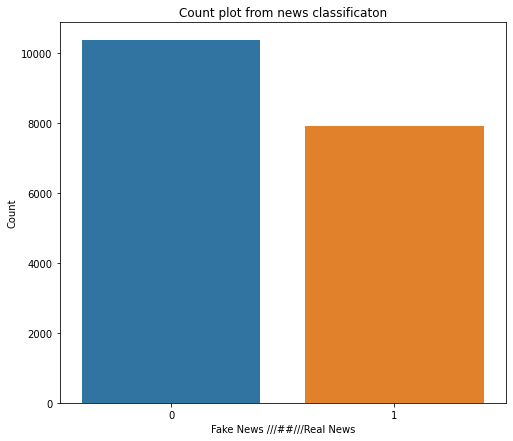

In [13]:
plt.figure(figsize=(8,7))
sns.countplot(x='label',data=df)
plt.title("Count plot from news classificaton")
plt.xlabel('Fake News ///##///Real News')
plt.ylabel("Count")
plt.show()

In [14]:
news = df.copy()

In [15]:
news.reset_index(inplace=True)

In [16]:
#Importing essential libraries for performing Natural Language Processing
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#Cleaning the news
corpus = []
ps = PorterStemmer()
for i in range(0,news.shape[0]):
  #Cleaning Special Character from the news title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])
  #convert the entrie row news title to the lower case
  title = title.lower()
  #Tokenizing the title into news words
  words = title.split()
  #Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]
  #Stemming the words
  words = [ps.stem(word) for word in words]
  #Joining the Stemmend words
  title = ' '.join(words)
  #Buliding a corpus of news title
  corpus.append(title)

In [18]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [19]:
#Creating the Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [20]:
X.shape

(18285, 5000)

In [21]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
#Extracting dependant variable to the data set
y = news['label']

In [23]:
y.shape

(18285,)

#Spliting the data set using train_test_split

In [24]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
training_x.shape

(14628, 5000)

In [26]:
test_y

10363    1
6134     0
13100    0
12643    0
14556    1
        ..
6775     1
12340    1
4489     1
18030    0
12331    1
Name: label, Length: 3657, dtype: int64

#Model Building

#Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(training_x,training_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = lr.predict(test_x)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2082
           1       0.88      0.96      0.92      1575

    accuracy                           0.93      3657
   macro avg       0.92      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657



In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is: ",accuracy_score(test_y,y_pred))

Accuracy Score is:  0.9258955427946404


In [31]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(test_y,y_pred)

In [32]:
lr_cm

array([[1867,  215],
       [  56, 1519]])

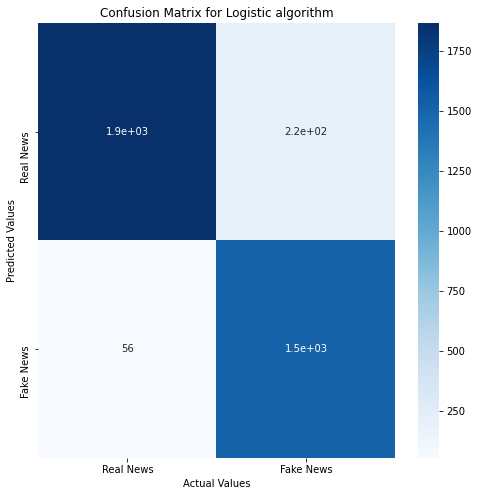

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(data=lr_cm, annot=True, cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News ','Fake News'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Logistic algorithm")
plt.show()

#Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(training_x,training_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
y_pred = rfc.predict(test_x)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2082
           1       0.87      0.96      0.92      1575

    accuracy                           0.92      3657
   macro avg       0.92      0.93      0.92      3657
weighted avg       0.93      0.92      0.92      3657



In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.9239814055236533


In [38]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(test_y,y_pred)
rfc_cm

array([[1863,  219],
       [  59, 1516]])

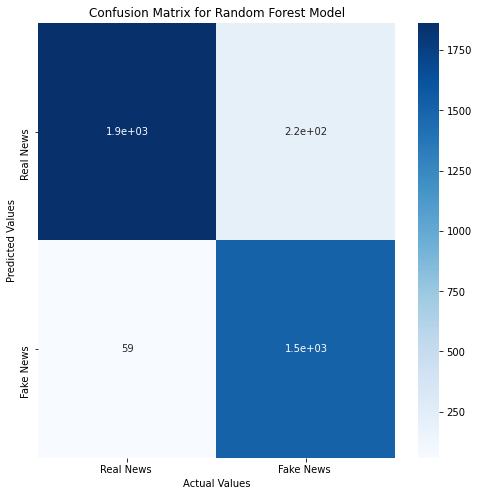

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(data=rfc_cm, annot=True, cmap='Blues', xticklabels=['Real News ', 'Fake News '], yticklabels=['Real News','Fake News'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

#Prediction

In [40]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return lr.predict(temp)

In [41]:
#Importing test Data set
df_test = pd.read_csv('/content/drive/My Drive/kaggle_fake_test.csv')

In [42]:
df_test.shape

(5200, 4)

In [43]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [44]:
news_title = df_test['title']

In [45]:
news_title.shape

(5200,)

In [46]:
# For generating random integer
from random import randint

In [47]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Alarmist report: Earth to lose 67% of wildlife populations by 2020
Prediction: This is a FAKE news!


In [48]:
#Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: DIY: Learn to Make the Most Powerful Natural Antibiotic Ever – Kills Any Infection In The Body
Prediction: This is a FAKE news!


In [49]:
#Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Day Without Illegals Becomes a Political Dud - Breitbart
Prediction: This is a REAL news.
